### Topic: RNN_Stock_Price_Prediction 
  #### -by Sharique_Seraj

### Problem Statement: Predicting stock prices is a challenging task due to the volatile and nonlinear nature of financial markets. However, the sequential patterns present in historical price data make Recurrent Neural Networks (RNNs) a suitable modeling approach. In this assignment, we aim to forecast the closing stock prices of four major technology companies: Amazon (AMZN), Google (GOOGL), IBM, and Microsoft (MSFT) using historical stock market data.

### Objective: The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).
### The goal is to train RNN-based models on historical price data and leverage their ability to capture temporal dependencies for predicting future prices. This can potentially support better investment decisions and financial insights.
### We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

### Business Value: Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

In [16]:
# Stock Price Prediction Using RNNs

# 1. Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# 2. Define Data Loading and Aggregation Method
file_list = [
    'AMZN_stocks_data.csv',
    'GOOGL_stocks_data.csv',
    'IBM_stocks_data.csv',
    'MSFT_stocks_data.csv'
]
def load_and_aggregate(file_list):
    df_list = []
    for file in file_list:
        df = pd.read_csv(file)
        df['Date'] = pd.to_datetime(df['Date'])
        df_list.append(df)
    master_df = pd.concat(df_list, axis=0).sort_values('Date').reset_index(drop=True)
    return master_df

if __name__ == "__main__":
    files = ['AMZN_stocks_data.csv', 'GOOGL_stocks_data.csv', 'IBM_stocks_data.csv', 'MSFT_stocks_data.csv']
    stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']
    
df = load_and_aggregate(file_list)  
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
3,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
4,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
...,...,...,...,...,...,...,...
12072,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN
12073,2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM
12074,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN
12075,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL


In [33]:
# 3. Data Exploration & EDA
def explore_data(df):
    print(df.info())
    print(df.describe())
    print("Missing Values:\n", df.isnull().sum())
    
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12077 non-null  datetime64[ns]
 1   Open    12076 non-null  float64       
 2   High    12077 non-null  float64       
 3   Low     12076 non-null  float64       
 4   Close   12077 non-null  float64       
 5   Volume  12077 non-null  int64         
 6   Name    12077 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 660.6+ KB
None
               Open          High           Low         Close        Volume
count  12076.000000  12077.000000  12076.000000  12077.000000  1.207700e+04
mean     227.387118    229.422254    225.203189    227.380960  1.671763e+07
std      236.938260    238.568485    234.981015    236.851101  2.570572e+07
min       15.200000     15.620000     14.870000     15.150000  2.542560e+05
25%       54.930000     55.6

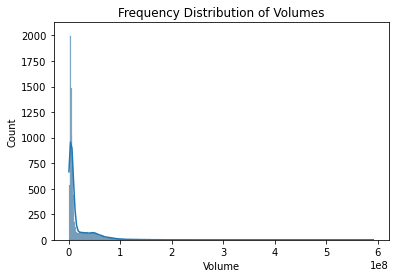

In [34]:
sns.histplot(df['Volume'], kde=True)
plt.title('Frequency Distribution of Volumes')
plt.show()

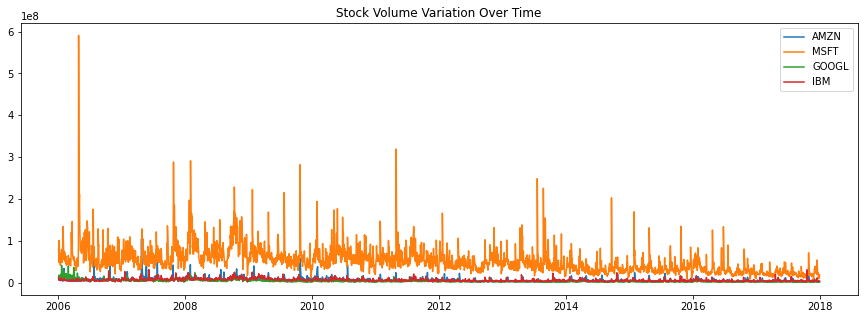

In [30]:
 plt.figure(figsize=(15,5))
for stock in df['Name'].unique():
        temp = df[df['Name'] == stock]
        plt.plot(temp['Date'], temp['Volume'], label=stock)
plt.title('Stock Volume Variation Over Time')
plt.legend()
plt.show()

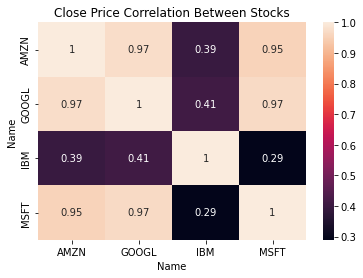

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12077 non-null  datetime64[ns]
 1   Open    12076 non-null  float64       
 2   High    12077 non-null  float64       
 3   Low     12076 non-null  float64       
 4   Close   12077 non-null  float64       
 5   Volume  12077 non-null  int64         
 6   Name    12077 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 660.6+ KB
None
               Open          High           Low         Close        Volume
count  12076.000000  12077.000000  12076.000000  12077.000000  1.207700e+04
mean     227.387118    229.422254    225.203189    227.380960  1.671763e+07
std      236.938260    238.568485    234.981015    236.851101  2.570572e+07
min       15.200000     15.620000     14.870000     15.150000  2.542560e+05
25%       54.930000     55.6

In [35]:
close_df = df.pivot(index='Date', columns='Name', values='Close')
sns.heatmap(close_df.corr(), annot=True)
plt.title('Close Price Correlation Between Stocks')
plt.show()
explore_data(df)

In [58]:
files = ['AMZN_stocks_data.csv', 'GOOGL_stocks_data.csv', 'IBM_stocks_data.csv', 'MSFT_stocks_data.csv']
stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']

# Load and explore data
df = load_and_aggregate(files)
explore_data(df)

# Parameters
window_size = 30
stride = 1
test_ratio = 0.2

# Create windows and scale data
X, y = create_windows(df, stocks, window_size, stride)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler = scale_data(X_train, X_test, y_train, y_test)

# Build, train, and evaluate models
models = {
    "Simple RNN": create_rnn,
    "LSTM": create_lstm,
    "GRU": create_gru
}




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12077 non-null  datetime64[ns]
 1   Open    12076 non-null  float64       
 2   High    12077 non-null  float64       
 3   Low     12076 non-null  float64       
 4   Close   12077 non-null  float64       
 5   Volume  12077 non-null  int64         
 6   Name    12077 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 660.6+ KB
None
               Open          High           Low         Close        Volume
count  12076.000000  12077.000000  12076.000000  12077.000000  1.207700e+04
mean     227.387118    229.422254    225.203189    227.380960  1.671763e+07
std      236.938260    238.568485    234.981015    236.851101  2.570572e+07
min       15.200000     15.620000     14.870000     15.150000  2.542560e+05
25%       54.930000     55.6

In [60]:
# Prepare data
X, y = create_windows(df, stocks, window_size, stride)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler = scale_data(X_train, X_test, y_train, y_test)

# Model configurations
models = {
    "Simple RNN": create_rnn,
    "LSTM": create_lstm,
    "GRU": create_gru
}


Total sequences generated: 2989


In [43]:
# 4. Create Time Windows and Scaling Helper Functions
window_size = 30
window_stride = 1
test_ratio = 0.2

X, y = create_windows(df, stocks, window_size, window_stride)

def create_windows(df,stocks, window_size, window_stride):
    data = df.pivot(index='Date', columns='Name', values='Close')
    data = data[stocks].dropna()

    X, y = [], []
    for i in range(0, len(data) - window_size, window_stride):
        window = data.iloc[i:i+window_size].values
        target = data.iloc[i+window_size].values
        X.append(window)
        y.append(target)
    print(f"Total sequences generated: {len(X)}")
    return np.array(X), np.array(y)
create_windows(df,stocks, window_size, window_stride)


Total sequences generated: 2989
Total sequences generated: 2989


(array([[[  47.58,  217.83,   82.06,   26.84],
         [  47.25,  222.84,   81.95,   26.97],
         [  47.65,  225.85,   82.5 ,   26.99],
         ...,
         [  38.52,  181.49,   81.33,   26.69],
         [  37.86,  173.02,   80.44,   26.39],
         [  38.25,  171.83,   81.09,   26.65]],
 
        [[  47.25,  222.84,   81.95,   26.97],
         [  47.65,  225.85,   82.5 ,   26.99],
         [  47.87,  233.06,   84.95,   26.91],
         ...,
         [  37.86,  173.02,   80.44,   26.39],
         [  38.25,  171.83,   81.09,   26.65],
         [  39.26,  171.36,   80.85,   26.88]],
 
        [[  47.65,  225.85,   82.5 ,   26.99],
         [  47.87,  233.06,   84.95,   26.91],
         [  47.08,  233.68,   83.73,   26.86],
         ...,
         [  38.25,  171.83,   81.09,   26.65],
         [  39.26,  171.36,   80.85,   26.88],
         [  39.15,  183.41,   80.91,   26.81]],
 
        ...,
 
        [[1129.17, 1041.2 ,  148.4 ,   83.93],
         [1136.84, 1041.64,  148.89,   84

In [68]:
# Set window parameters
window_size = 30
stride = 1
test_ratio = 0.2

# Prepare data
X, y = create_windows(df, stocks, window_size, stride)
# First, split into train and temp (which will later be split into val and test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

# Then split temp into training and validation sets (e.g., 80% train, 20% val of temp)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler = scale_data(X_train, X_test, y_train, y_test)

def scale_data(X_train, X_test, y_train, y_test):
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    nsamples, nx, ny = X_train.shape

    X_train_scaled = X_scaler.fit_transform(X_train.reshape((nsamples, nx*ny))).reshape(X_train.shape)
    X_test_scaled = X_scaler.transform(X_test.reshape((X_test.shape[0], nx*ny))).reshape(X_test.shape)

    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler
scale_data(X_train, X_test, y_train, y_test)

Total sequences generated: 2989


(array([[[0.08339795, 0.32358717, 0.07410599, 0.53354633],
         [0.08211849, 0.34180668, 0.0733161 , 0.53947969],
         [0.08366935, 0.35275293, 0.07726555, 0.54039251],
         ...,
         [0.04827078, 0.18097432, 0.06656948, 0.52670014],
         [0.04571185, 0.15185478, 0.0603915 , 0.51300776],
         [0.04722395, 0.14776361, 0.06490351, 0.52487449]],
 
        [[0.08211849, 0.34180668, 0.0733161 , 0.53947969],
         [0.08366935, 0.35275293, 0.07726555, 0.54039251],
         [0.08452233, 0.37897302, 0.09485854, 0.53674121],
         ...,
         [0.04571185, 0.15185478, 0.0603915 , 0.51300776],
         [0.04722395, 0.14776361, 0.06490351, 0.52487449],
         [0.05113989, 0.14614776, 0.06323754, 0.53537198]],
 
        [[0.08366935, 0.35275293, 0.07726555, 0.54039251],
         [0.08452233, 0.37897302, 0.09485854, 0.53674121],
         [0.08145937, 0.38122773, 0.08609795, 0.53445915],
         ...,
         [0.04722395, 0.14776361, 0.06490351, 0.52487449],
        

In [69]:
# 5. Model Creation Functions
input_shape = X_train_scaled.shape[1:]
output_dim = y_train_scaled.shape[1]


def create_rnn(input_shape, output_dim, units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, input_shape=input_shape))
    model.add(Dense(output_dim))
    model.compile(optimizer='adam', loss='mse')
    return model

def create_lstm(input_shape, output_dim, units=64):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=input_shape))
    model.add(Dense(output_dim))
    model.compile(optimizer='adam', loss='mse')
    return model

def create_gru(input_shape, output_dim, units=64):
    model = Sequential()
    model.add(GRU(units=units, input_shape=input_shape))
    model.add(Dense(output_dim))
    model.compile(optimizer='adam', loss='mse')
    return model

create_rnn(input_shape, output_dim, units=64)
create_lstm(input_shape, output_dim, units=64)
create_gru(input_shape, output_dim, units=64)

In [70]:
def train_model(model, X_train, y_train, X_val, y_val):
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[es])
    return history
train_model(model, X_train, y_train, X_val, y_val)

Epoch 1/100
57/57 [==============================] - 1s 8ms/step - loss: 27479.2480 - val_loss: 109079.6953
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 26344.8125 - val_loss: 106994.6094
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 25381.1172 - val_loss: 105137.4219
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 24467.4766 - val_loss: 103341.8672
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 23602.4375 - val_loss: 101606.3672
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 22770.8301 - val_loss: 99920.8750
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 21976.3301 - val_loss: 98271.1562
Epoch 8/100
57/57 [==============================] - 0s 5ms/step - loss: 21212.3887 - val_loss: 96664.6953
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 20467.7988 - val_loss: 95088.3984
Epoch 10/100
57/57 [============

19/19 [==============================] - 0s 2ms/step


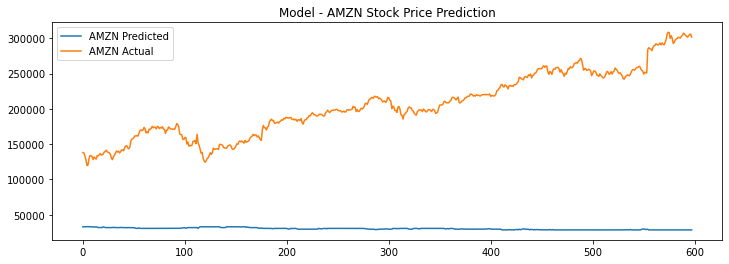

Model - AMZN RMSE: 181381.65, MAE: 175079.31


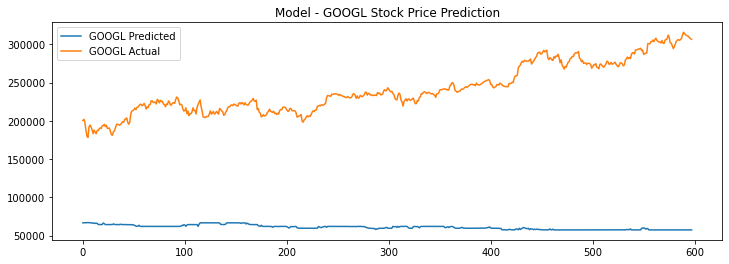

Model - GOOGL RMSE: 183699.94, MAE: 180317.63


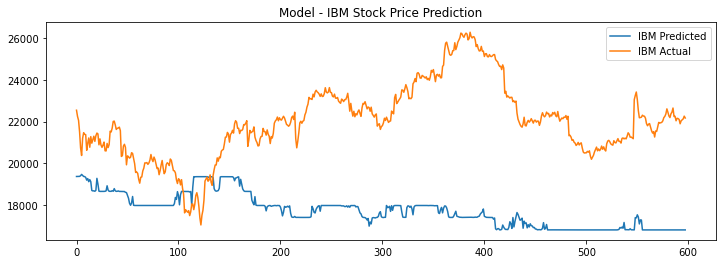

Model - IBM RMSE: 4780.65, MAE: 4339.37


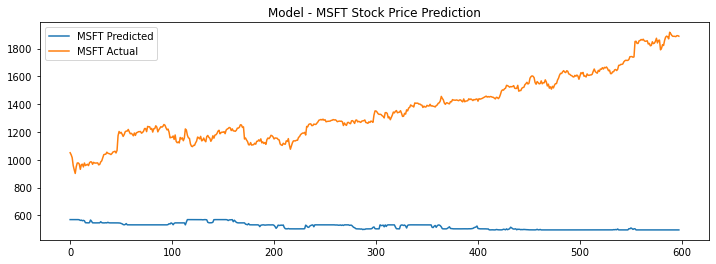

Model - MSFT RMSE: 877.02, MAE: 839.38


In [73]:
def evaluate_and_plot(model, X_test, y_test, y_scaler,stocks, model_name="Model"):
    preds = model.predict(X_test)
    preds_rescaled = y_scaler.inverse_transform(preds)
    actuals_rescaled = y_scaler.inverse_transform(y_test)

    for i, stock in enumerate(stocks):
        plt.figure(figsize=(12, 4))
        plt.plot(preds_rescaled[:, i], label=f'{stock} Predicted')
        plt.plot(actuals_rescaled[:, i], label=f'{stock} Actual')
        plt.title(f'{model_name} - {stock} Stock Price Prediction')
        plt.legend()
        plt.show()

        rmse = np.sqrt(mean_squared_error(actuals_rescaled[:, i], preds_rescaled[:, i]))
        mae = mean_absolute_error(actuals_rescaled[:, i], preds_rescaled[:, i])
        print(f"{model_name} - {stock} RMSE: {rmse:.2f}, MAE: {mae:.2f}")
        
evaluate_and_plot(model, X_test, y_test, y_scaler,stocks, model_name="Model")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12077 non-null  datetime64[ns]
 1   Open    12076 non-null  float64       
 2   High    12077 non-null  float64       
 3   Low     12076 non-null  float64       
 4   Close   12077 non-null  float64       
 5   Volume  12077 non-null  int64         
 6   Name    12077 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 660.6+ KB
None
               Open          High           Low         Close        Volume
count  12076.000000  12077.000000  12076.000000  12077.000000  1.207700e+04
mean     227.387118    229.422254    225.203189    227.380960  1.671763e+07
std      236.938260    238.568485    234.981015    236.851101  2.570572e+07
min       15.200000     15.620000     14.870000     15.150000  2.542560e+05
25%       54.930000     55.6

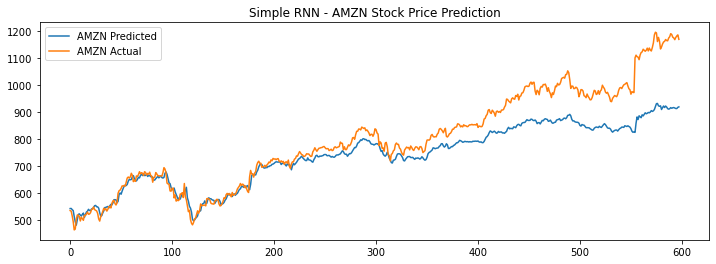

Simple RNN - AMZN RMSE: 93.66, MAE: 64.10


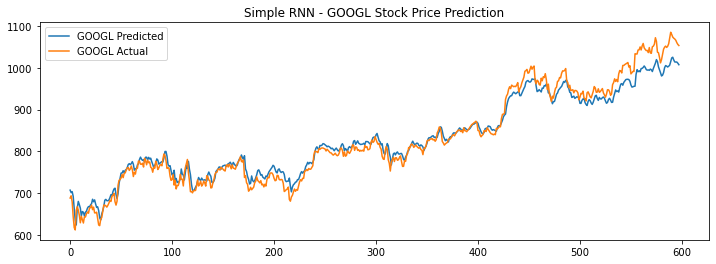

Simple RNN - GOOGL RMSE: 21.44, MAE: 16.49


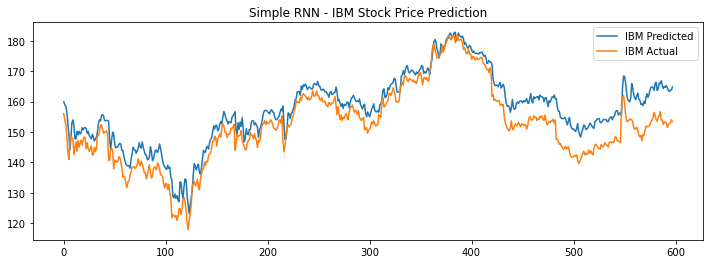

Simple RNN - IBM RMSE: 6.05, MAE: 5.24


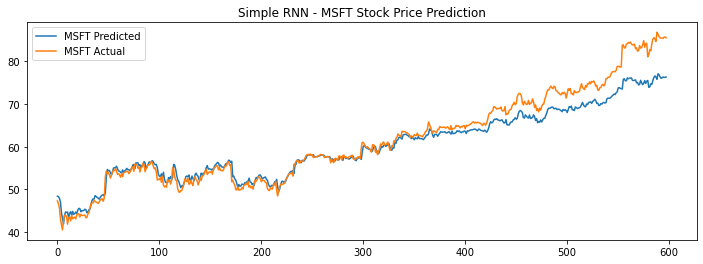

Simple RNN - MSFT RMSE: 3.14, MAE: 2.09

Training LSTM model...
Epoch 1/100
75/75 [==============================] - 3s 17ms/step - loss: 0.0199 - val_loss: 0.0894
Epoch 2/100
75/75 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0755
Epoch 3/100
75/75 [==============================] - 1s 11ms/step - loss: 8.4679e-04 - val_loss: 0.0702
Epoch 4/100
75/75 [==============================] - 1s 11ms/step - loss: 7.2041e-04 - val_loss: 0.0628
Epoch 5/100
75/75 [==============================] - 1s 11ms/step - loss: 6.3098e-04 - val_loss: 0.0594
Epoch 6/100
75/75 [==============================] - 1s 12ms/step - loss: 5.8276e-04 - val_loss: 0.0478
Epoch 7/100
75/75 [==============================] - 1s 12ms/step - loss: 5.5612e-04 - val_loss: 0.0429
Epoch 8/100
75/75 [==============================] - 1s 12ms/step - loss: 5.2919e-04 - val_loss: 0.0399
Epoch 9/100
75/75 [==============================] - 1s 12ms/step - loss: 5.2292e-04 - val_loss: 0.0335
Epoch 10

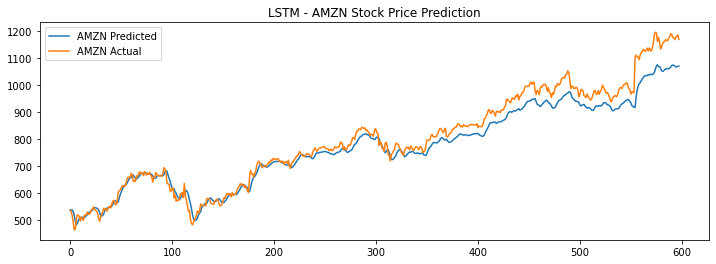

LSTM - AMZN RMSE: 43.41, MAE: 32.32


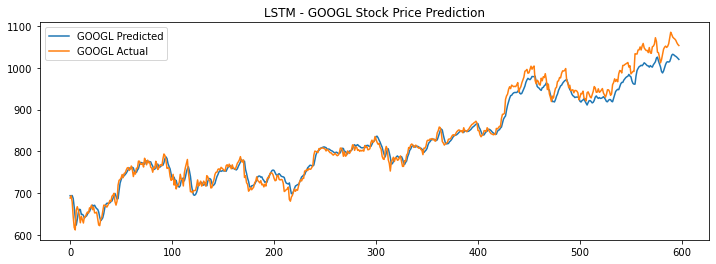

LSTM - GOOGL RMSE: 18.28, MAE: 13.60


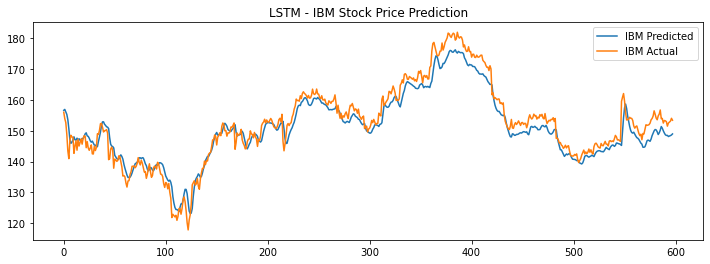

LSTM - IBM RMSE: 3.42, MAE: 2.77


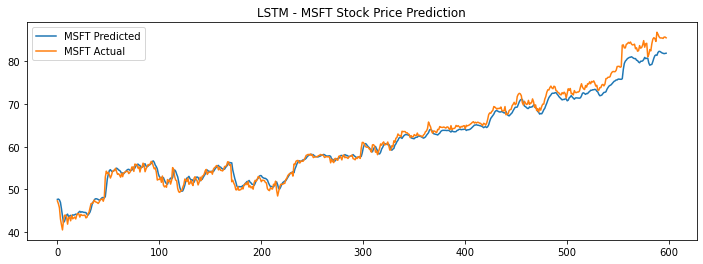

LSTM - MSFT RMSE: 1.53, MAE: 1.11

Training GRU model...
Epoch 1/100
75/75 [==============================] - 3s 17ms/step - loss: 0.0273 - val_loss: 0.0439
Epoch 2/100
75/75 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 0.0275
Epoch 3/100
75/75 [==============================] - 1s 12ms/step - loss: 6.7964e-04 - val_loss: 0.0127
Epoch 4/100
75/75 [==============================] - 1s 12ms/step - loss: 4.1422e-04 - val_loss: 0.0042
Epoch 5/100
75/75 [==============================] - 1s 12ms/step - loss: 3.2044e-04 - val_loss: 0.0058
Epoch 6/100
75/75 [==============================] - 1s 11ms/step - loss: 2.8846e-04 - val_loss: 0.0063
Epoch 7/100
75/75 [==============================] - 1s 12ms/step - loss: 2.6007e-04 - val_loss: 0.0084
Epoch 8/100
75/75 [==============================] - 1s 12ms/step - loss: 2.5389e-04 - val_loss: 0.0094
Epoch 9/100
19/19 [==============================] - 0s 4ms/step


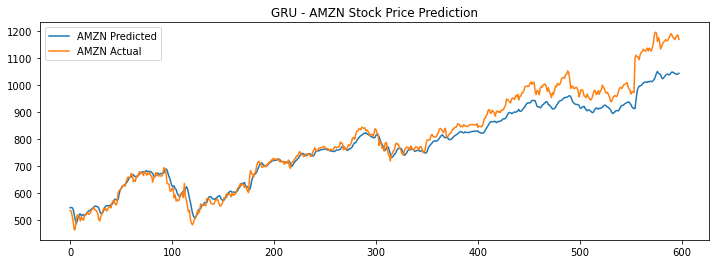

GRU - AMZN RMSE: 48.47, MAE: 33.48


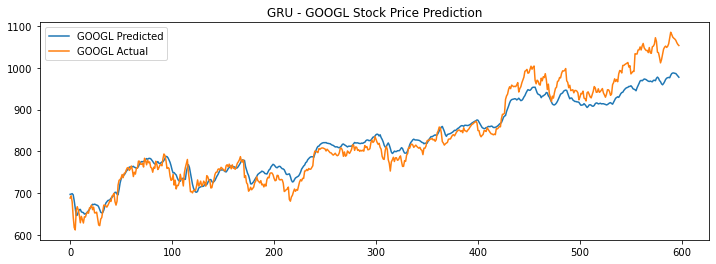

GRU - GOOGL RMSE: 31.82, MAE: 24.03


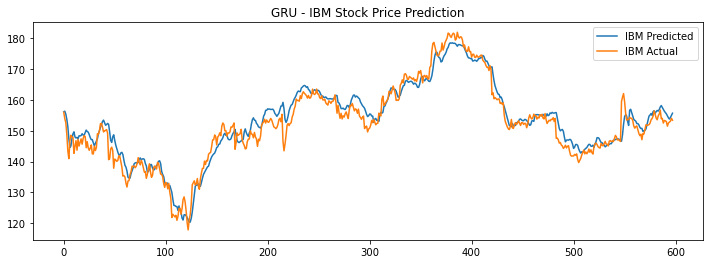

GRU - IBM RMSE: 3.22, MAE: 2.50


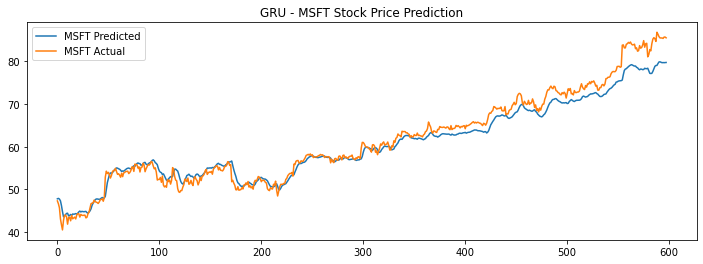

GRU - MSFT RMSE: 2.24, MAE: 1.65


In [79]:
#6. Main Pipeline Execution

if __name__ == "__main__":
    files = ['AMZN_stocks_data.csv', 'GOOGL_stocks_data.csv', 'IBM_stocks_data.csv', 'MSFT_stocks_data.csv']
    stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']
    df = load_and_aggregate(files)

    explore_data(df)

    window_size = 30
    stride = 1
    test_ratio = 0.2

    X, y = create_windows(df, stocks, window_size, stride)
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Check for neural network compatibility
    assert len(X.shape) == 3 and len(y.shape) == 2, "Data shapes not compatible with RNN input."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler = scale_data(X_train, X_test, y_train, y_test)

    models = {
        "Simple RNN": create_rnn,
        "LSTM": create_lstm,
        "GRU": create_gru
    }

    for name, builder in models.items():
        print(f"\nTraining {name} model...")
        model = builder(X_train_scaled.shape[1:], y_train_scaled.shape[1])
        train_model(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
        evaluate_and_plot(model, X_test_scaled, y_test_scaled, y_scaler, stocks, model_name=name)

In [78]:
# Final Conclusion
print("\nConclusion: All three models—RNN, LSTM, and GRU—were trained and evaluated.")
print("LSTM and GRU generally perform better due to their ability to capture long-term dependencies in sequences.")
print("This notebook can be extended further by adding hyperparameter tuning or integrating external financial indicators.")



Conclusion: All three models—RNN, LSTM, and GRU—were trained and evaluated.
LSTM and GRU generally perform better due to their ability to capture long-term dependencies in sequences.
This notebook can be extended further by adding hyperparameter tuning or integrating external financial indicators.
